# Question 1

> First of all we imported the Plots package <br>
Then we used the gr backend

In [1]:
using Plots
gr()

Plots.GRBackend()

> Then we loaded the file *hw1a.txt* into the array dat as a string and then turned all those strings into floats using the **parse** function.

In [1]:
data = []
open("hw1a.txt") do file
    for ln in eachline(file)            #reading the file hw1a.txt into the array dat as strings then using 
        push!(data, parse(Float64,ln))  # turning all those strings into floats using parse function
    end
end  


# Function : first_k
> This function takes an array and number **k** and returns the **average** of first **k** numbers in that array

In [3]:
function first_k(array, k)
    avg = sum(array[1:k])/k       # average = sum(array[1]+ array[2]+ .... array[k])/k    
    return avg
end    
    

first_k (generic function with 1 method)

# Function : k_after_arbitrary
> This function takes an array and number **k** <br>
In this function we have assumed that arbitrary point is a point ranging from (1000 + (a random point from 0 to 100)) i.e <br> arbitrary point $\in (1000,1100)$   <br>
This function return the average of values in array from arbitrary to arbitrary + k points

In [4]:
function k_after_arbitrary(array, k)
    arbitrary = 1000 + rand(1:100)   # arbitrary point = random point from 1000 to 1100
    avg = sum(array[arbitrary:(arbitrary+k)])/k
    return avg                  # average = sum(array[arbitrary]+ array[arbitrary+1] ..... array[arbitrary+k])/k
end

k_after_arbitrary (generic function with 1 method)

# Function 3 : random_k
> This function takes an array and number k and return the average of k random points in the array

In [5]:
function random_k(array, k)
    indices = rand(1:size(array)[1], k) #k random points from 1 to 10000 
    avg = sum(array[indices])/k         # average of those k random points
    return avg
end    

random_k (generic function with 1 method)

# Function 4 : scat_plot
> This function takes an array, number **k**, number **iterations** as a input <br>
Then it iterates the functions first_k, k_after_arbitrary and random_k for iterations times stores them into an array y_values of size(3, iterations) <br>
> The function then returns 3 scatter plots with x axis having points from 1 to iterations and y axis having the iterations values from 3 functions

In [6]:
function scat_plot(array, k, iterations)
    y_value = zeros(Float64, (3,iterations))
    
    for i in 1:iterations
        y_value[1, i] = first_k(array, k)
        y_value[2, i] = k_after_arbitrary(array, k)
        y_value[3, i] = random_k(array,k)
    end
    
    
    p1 = scatter(collect(1:iterations), y_value[1,:], xlabel = "Iterations", ylabel = "Minutes",  size=(800,300), title="k = $k",
        color="blue")
    p2 = scatter(collect(1:iterations), y_value[2,:], xlabel = "Iterations", ylabel = "Minutes",  size=(800,300), color="red")
    p3 = scatter(collect(1:iterations), y_value[3,:], xlabel = "Iterations", ylabel = "Minutes", size=(800,300), color="green")
    return plot(p1, p2, p3, layout = (1,3), legend = false)
    
end        
        

scat_plot (generic function with 1 method)

PLotting all 15 plots for k = (10,20,50,100,200)

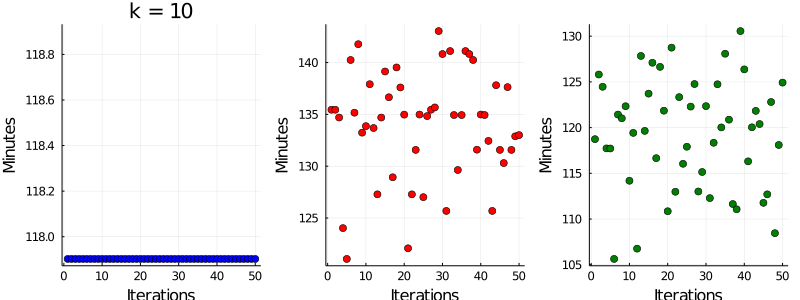

In [7]:
p1 = scat_plot(data, 10, 50)

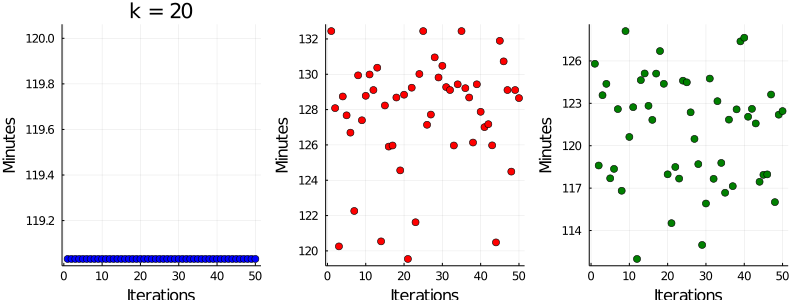

In [8]:
p2 = scat_plot(data, 20, 50)

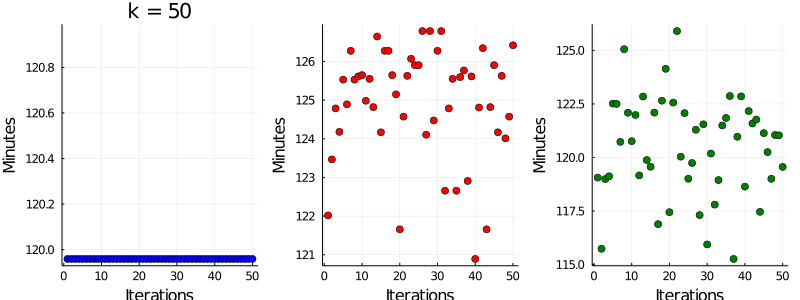

In [9]:
p3 = scat_plot(data, 50, 50)

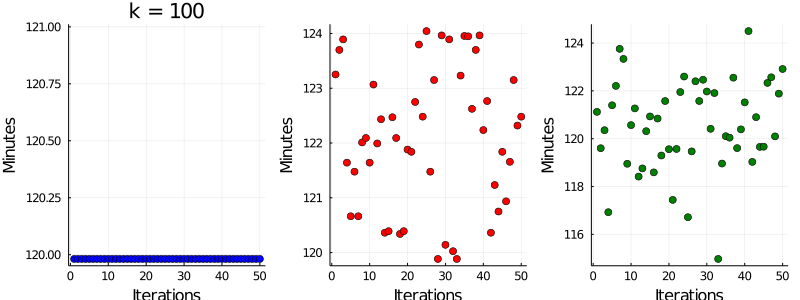

In [10]:
p4 = scat_plot(data, 100, 50)

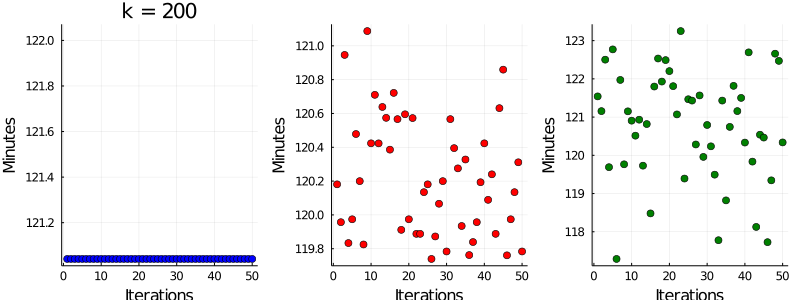

In [11]:
p5 = scat_plot(data, 200, 50)

In [2]:

N = size(data)[1]                      #number of heights
avg = sum(data)/N                     #Average of error
stan_dev = (sum((data.-avg).*(data.-avg))/N)^(0.5)

19.763510242447186

In [3]:
avg

120.27070302655935

10000